In [1]:
import yt
import napari 
from yt_napari.viewer import Scene

In [2]:
ds = yt.load_sample("Enzo_64") # will download 2.57 G on the first run

yt : [INFO     ] 2025-07-01 09:10:49,573 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/Enzo_64/DD0043/data0043'
yt : [INFO     ] 2025-07-01 09:10:49,919 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2025-07-01 09:10:49,919 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 09:10:49,920 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 09:10:49,920 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-01 09:10:49,921 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-01 09:10:49,921 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2025-07-01 09:10:49,922 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-01 09:10:49,923 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-01 09:10:49,923 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-01 09:10:49,923 Parameters:

In [5]:
v = napari.Viewer()
yt_scene = Scene()

Set the resolution to sample at: crank this up for more details if your machine can handle it:

In [7]:
res = (1200, 1200, 1200)

In [16]:
# plot the whole simulation
yt_scene.add_region(v,
                    ds,
                    ("enzo", "Density"),
                    colormap='magma',
                    contrast_limits=(-.28, 2.06),
                    take_log=True,
                    resolution= res)

In [17]:
v.dims.ndisplay = 3

In [22]:
v.camera.update({'center': (399.5, 399.5, 399.5),
 'zoom': 0.44163273255626356,
 'angles': (-14.990619816071016,
              22.976752039644087,
            48.051741515532996),
 'perspective': 0.0,})

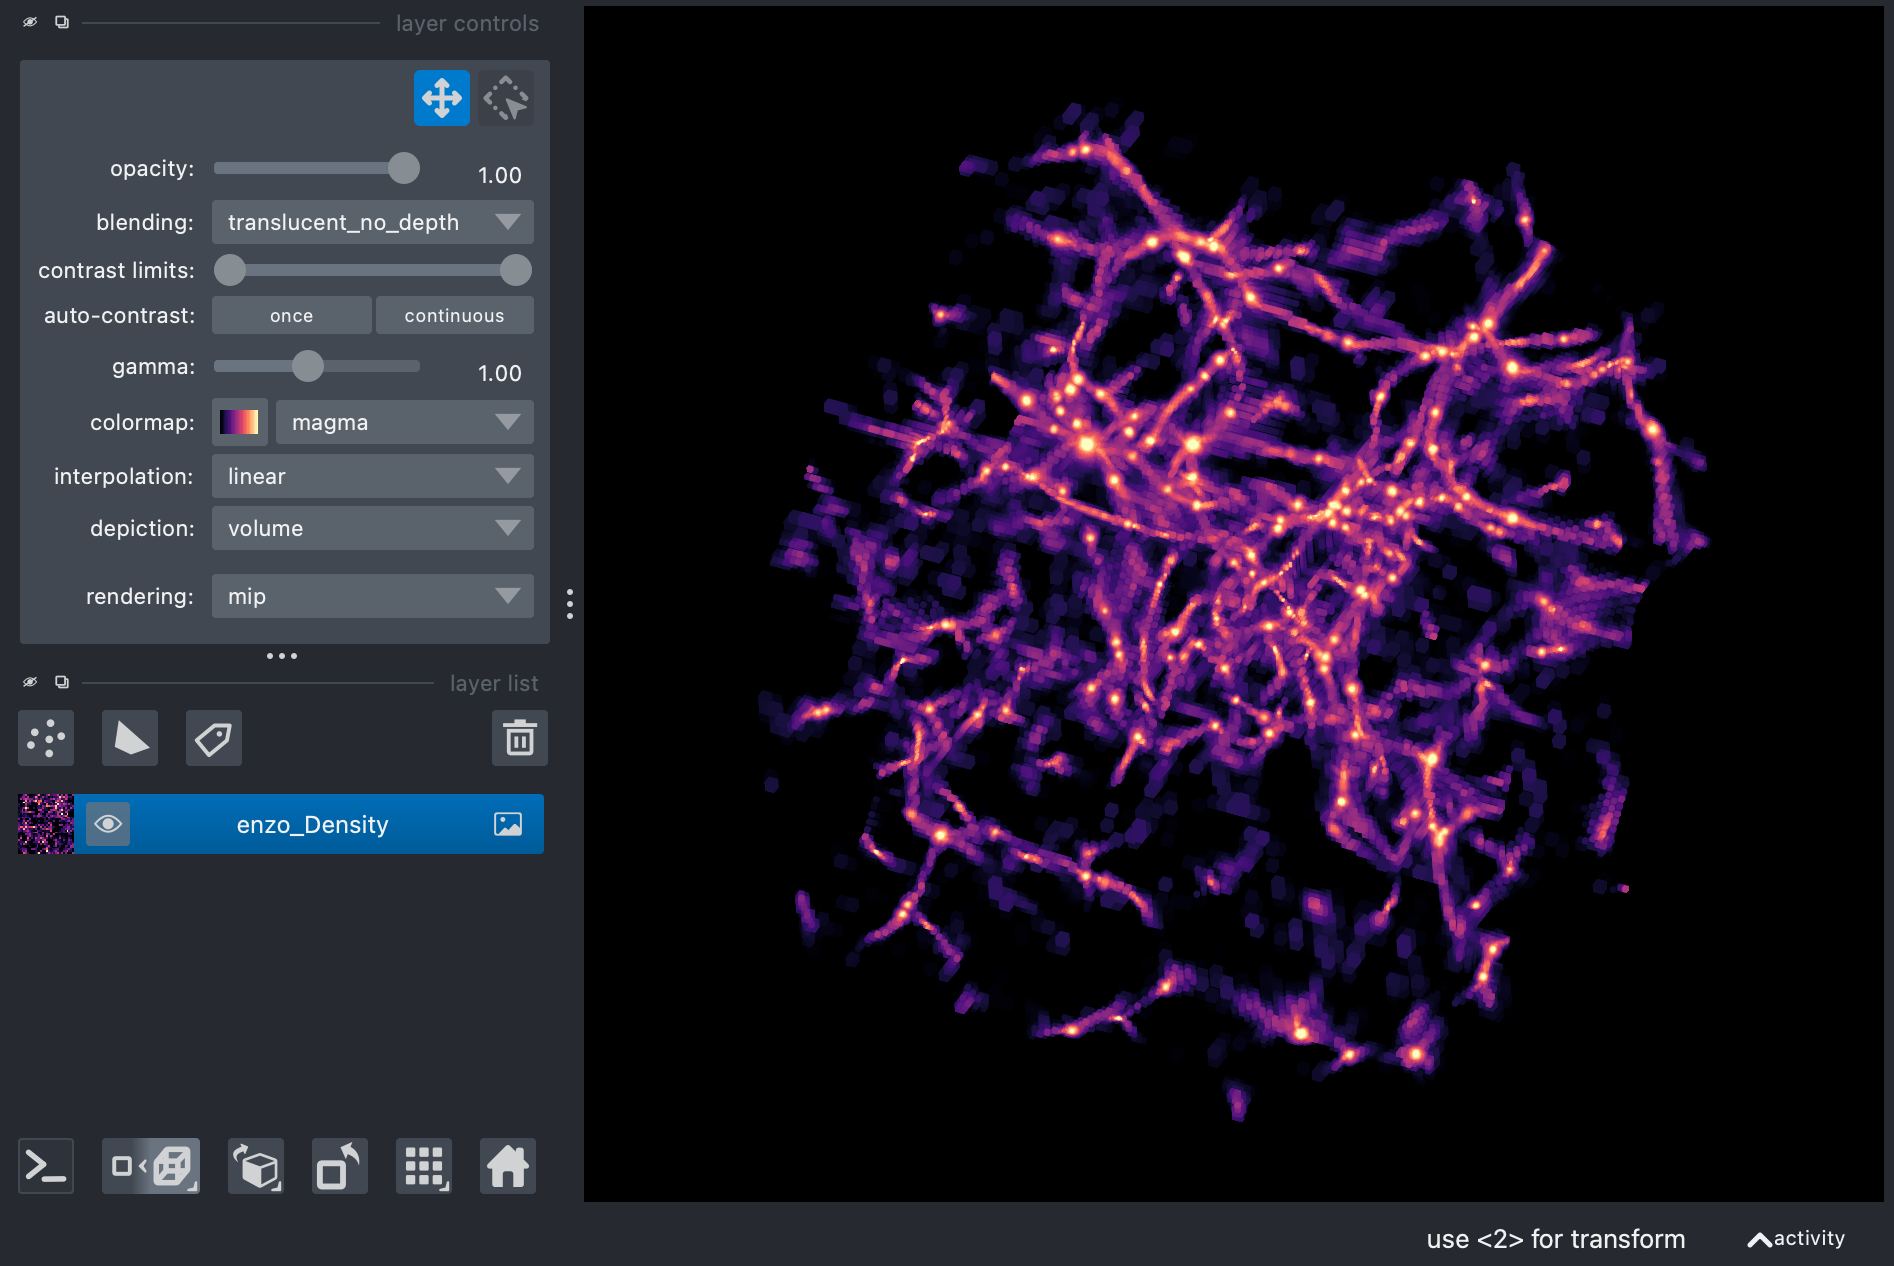

In [24]:
from napari.utils import nbscreenshot
nbscreenshot(v)

For reference, here's what a slice looks in yt like with the AMR grids overlaid: 

yt : [INFO     ] 2025-07-01 09:11:32,450 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 09:11:32,451 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 09:11:32,454 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 09:11:32,455 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 09:11:32,456 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



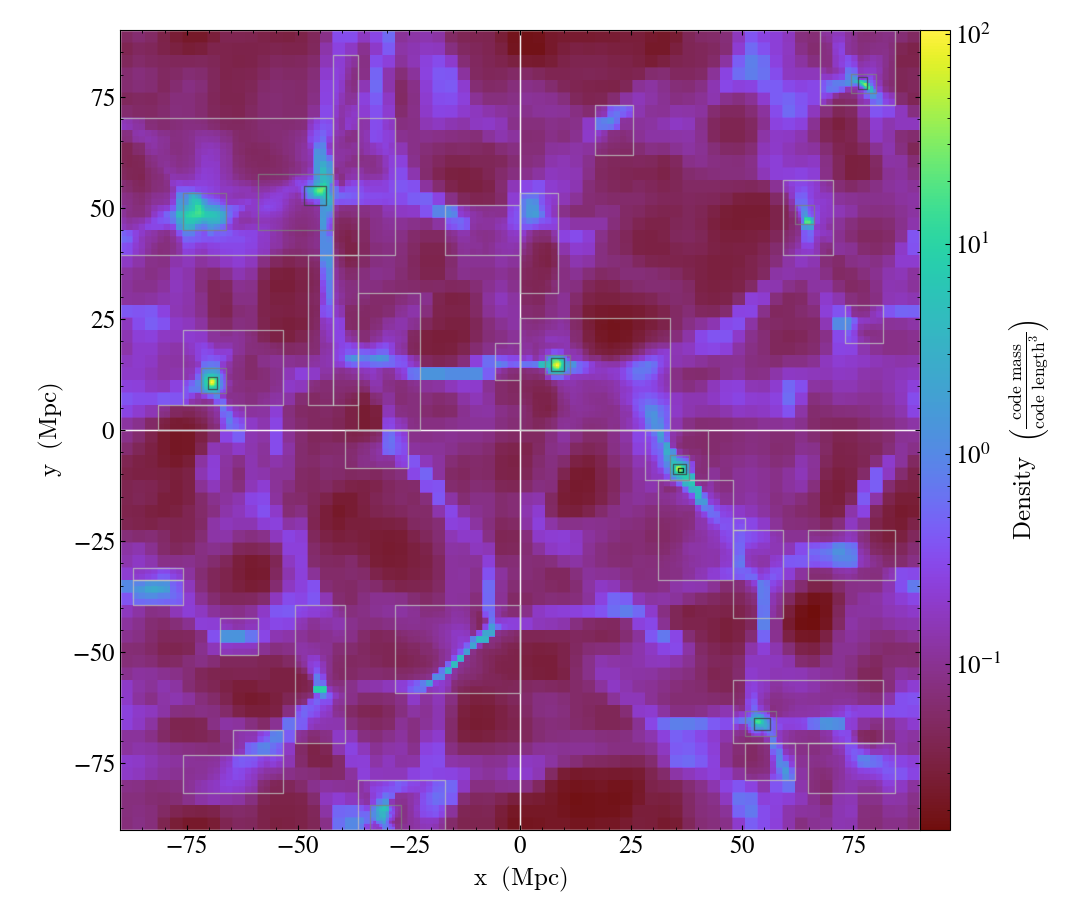

In [6]:
p = yt.SlicePlot(ds, 'z', ('enzo', 'Density'))
p.annotate_grids()

and the cells:


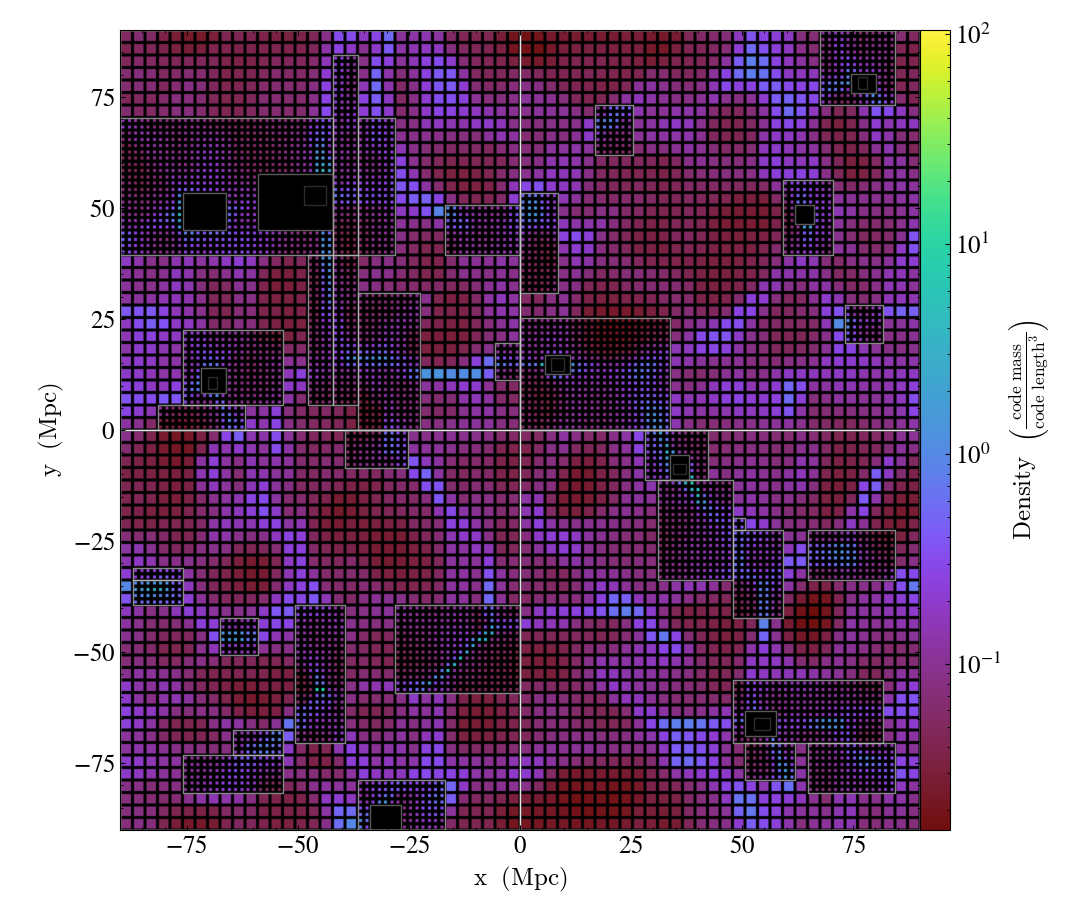

In [8]:
p.annotate_cell_edges()
p.show()

yt-napari resamples the AMR grid at a fixed resolution to load in napari.

To get a resampling resolution that would sample the most refined grids without loss of detail, can take the smallest dx (dx = spatial grid size):

In [11]:
ds.index.get_smallest_dx()

unyt_quantity(0.00097656, 'code_length')

and then divde the full domain width by the smallest dx:

In [14]:
ds.domain_width / ds.index.get_smallest_dx()

unyt_array([1024., 1024., 1024.], '(dimensionless)')

so a sample of (1024, 1024, 1024) should be sufficient to resample and preserve the smallest scale features. 